In [1]:
#load libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc

In [2]:
#read in our csv file through pandas
incubation = pd.read_csv('incubation_data_HW3 (1).csv', parse_dates=['State'])

In [3]:
#Part 1 sort by Anoxic and Oxic state

# create dataframe
data = incubation
df = pd.DataFrame(data)

# Sort the dataframe’s rows by State
b = df.sort_values(by =['State'])
display("Incuation DataFrame sorted by Anoxic and Oxic", b)

'Incuation DataFrame sorted by Anoxic and Oxic'

,Cycle,State,DOC_mgL-1,Error,Sulfate_mM,Error.1,Fe_uM,Error.2,Mn_uM,Error.3
0,1,Anoxic,27.906667,1.451926,0.000000,0.000000,6347.39035,174.05727,29.36418,0.06335
2,2,Anoxic,20.018667,2.835970,0.000000,0.000000,3223.27706,358.55438,21.72418,1.86388
4,3,Anoxic,20.438667,2.313653,0.000000,0.000000,2143.29331,11.65566,22.54822,2.04718
6,0,Anoxic,50.040000,3.111270,0.000000,0.000000,8396.16626,466.22335,39.04909,1.49401
1,1,Oxic,1.753467,0.517602,0.041005,0.011568,1.89314,1.72413,4.62133,2.82457
3,2,Oxic,3.297333,0.292271,0.105827,0.013117,5.14494,2.49502,5.99089,0.09757
5,3,Oxic,4.282667,0.218732,0.159357,0.021363,1.82269,0.63681,13.36719,2.54714
7,0,Oxic,4.556000,0.733505,0.338229,0.064050,14.06580,4.54148,3.70001,2.54148


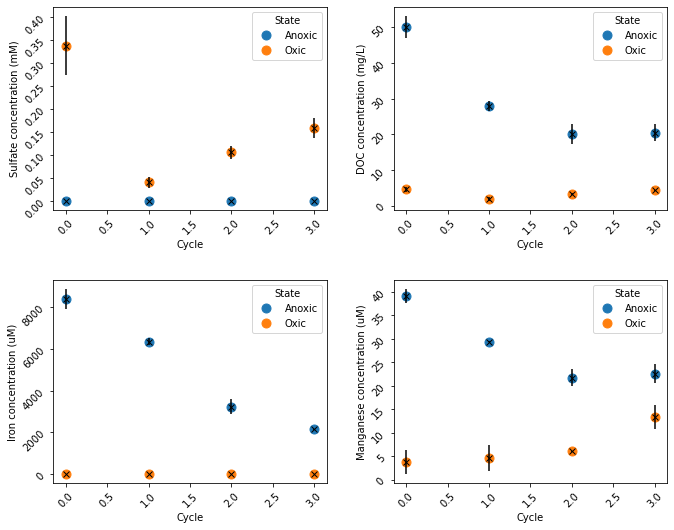

In [4]:
#Part 1 Figure 1 scatterplot
plt.figure(figsize=(10, 8))

#plot dissolved organic carbon, it's standard deviation error, and its anoxic and oxic states
plt.subplot(2,2,2)
x =  incubation['Cycle']
y = incubation['DOC_mgL-1']
c = incubation['Error']
#group the data by the column State
groups = incubation.groupby('State')
for name, group in groups:
    plt.plot(group['Cycle'], group['DOC_mgL-1'], marker='o', linestyle='', markersize=9, label=name)
#create the legend specifying anoxic and oxic conditions
plt.legend(loc="upper right", title="State", fontsize=10)
#label axes and space out the tick marks on the x axis for the cycle data
plt.xlabel('Cycle')
plt.ylabel('DOC concentration (mg/L)')
plt.tick_params(labelrotation=45)
#create a scatterplot
plt.scatter(x, y)
#create black, vertical error bars
plt.errorbar(x, y, yerr=c, fmt='x', color='k')

#plot sulfate, it's standard deviation error, and its anoxic and oxic states
plt.subplot(2,2,1)
x =  incubation['Cycle']
y = incubation['Sulfate_mM']
c = incubation['Error.1']
#group the data by the column State
groups = incubation.groupby('State')
for name, group in groups:
    plt.plot(group['Cycle'], group['Sulfate_mM'] , marker='o', linestyle='', markersize=9, label=name)
#create the legend specifying anoxic and oxic conditions
plt.legend(loc="upper right", title="State", fontsize=10)
#label axes and space out the tick marks on the x axis for the cycle data
plt.xlabel('Cycle')
plt.ylabel('Sulfate concentration (mM)')
plt.tick_params(labelrotation=45)
#create a scatterplot
plt.scatter(x, y)
#create black, vertical error bars
plt.errorbar(x, y, yerr=c, fmt='x', color='k')

#plot iron, it's standard deviation error, and its anoxic and oxic states
plt.subplot(2,2,3)
x =  incubation['Cycle']
y = incubation['Fe_uM']
c = incubation['Error.2']
#group the data by the column State
groups = incubation.groupby('State')
for name, group in groups:
    plt.plot(group['Cycle'], group['Fe_uM'] , marker='o', linestyle='', markersize=9, label=name)
#create the legend specifying anoxic and oxic conditions
plt.legend(loc="upper right", title="State", fontsize=10)
#label axes and space out the tick marks on the x axis for the cycle data
plt.xlabel('Cycle')
plt.ylabel('Iron concentration (uM)')
plt.tick_params(labelrotation=45)
#create a scatterplot
plt.scatter(x, y)
#create black, vertical error bars
plt.errorbar(x, y, yerr=c, fmt='x', color='k')

##plot manganese, it's standard deviation error, and its anoxic and oxic states
plt.subplot(2,2,4)
x =  incubation['Cycle']
y = incubation['Mn_uM']
c = incubation['Error.3']
#group the data by the column State
groups = incubation.groupby('State')
for name, group in groups:
    plt.plot(group['Cycle'], group['Mn_uM'] , marker='o', linestyle='', markersize=9, label=name)
#create the legend specifying anoxic and oxic conditions
plt.legend(loc="upper right", title="State", fontsize=10)
#label axes and space out the tick marks on the x axis for the cycle data
plt.xlabel('Cycle')
plt.ylabel('Manganese concentration (uM)')
plt.tick_params(labelrotation=45)
#create a scatterplot
plt.scatter(x, y)
#create black, vertical error bars
plt.errorbar(x, y, yerr=c, fmt='x', color='k')
plt.savefig('Anoxic_Oxic.png')
#Have the subplots be organized in a symetrical, tight layout with some small separation for readibility
plt.tight_layout(pad=3)
plt.show()

In [5]:
#Part 2 calcualtion

#Cycle 1 (1st cycle of anoxic to oxic incubation) in micromoles
Anoxic_Mn_cycle1 = 29.36418	

#Additional information
#100 mL of water or 0.1 L
#30 g of sediment
#8 days of anoxic-oxic cycle or 192 hours
#Mn molecular weight = 54.94 g/mol
#1 mol = 10**6 μmol
#1 g = 10**6 μg
#Mn_oxidation = μg/gram of sediment per hr

#Anoxic Mn in micromoles (mM) to Mn in micrograms (μg)

#Mutiply Mn mM by 1 mol/10**6 μmol
#0.1 L, Mn mol. weight, g to μg conversion, and divide by mol to μmol conversion to get μg Mn
Anoxic_Mn_mol = Anoxic_Mn_cycle1*10**6

#Convert Mn mol to g by multiplying by Mn molecular weight
Anoxic_Mn_g = Anoxic_Mn_mol*54.95

#Convert Mn g to μg by diving by 1 g/10**6 μg and multiplying by 0.1 L
Anoxic_Mn_μg = (Anoxic_Mn_g/10**6)*0.1

#Dvide Mn in μg by 192 hours
Anoxic_Mn_μg_hour = Anoxic_Mn_μg/192

#Divide Mn in μg per hour by 30 g sediment
Mn_oxidation_rate = Anoxic_Mn_μg_hour/30

#Display Mn_oxidation in μg/gram of sediment per hr
display(Mn_oxidation_rate)


0.028013223802083334